In [14]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
file_path = "dataset/0a7e8940-9008-45fa-9a99-054757404083.h5"
#file_path = "dataset/0b59e07a-82e6-4b4b-8c33-adbd9b8ebc55.h5"

wall_thickness = None
magnetization = None
with h5py.File(file_path, 'r') as file:
    # Auflisten aller Gruppen und Datasets in der Datei
    def printname(name):
        print(name)
    file.visit(printname)
    timestamp = file["data/timestamp"][:]
    magnetization = file["data/magnetization"][:]


data
data/defect_channel
data/distance
data/magnetization
data/timestamp
data/velocity
data/wall_thickness


In [16]:
df1 = pd.DataFrame(timestamp)
df2 = pd.DataFrame(magnetization)
df1[0] = pd.to_numeric(df1[0], errors='coerce')
df2[0] = pd.to_numeric(df2[0], errors='coerce') #easter egg ignorieren
combined_df = pd.concat([df1, df2], axis=1)

In [17]:
correlation_matrix = combined_df.corr()
print(correlation_matrix)

          0         0
0  1.000000  0.013878
0  0.013878  1.000000


AttributeError: module 'matplotlib.pyplot' has no attribute 'DateFormatter'

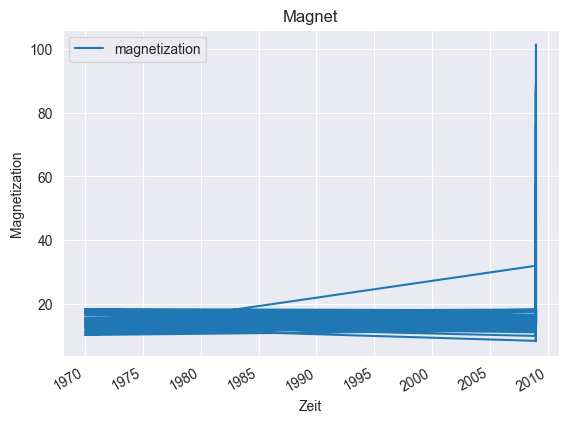

In [35]:
combined_df.columns = ['timestamp', 'magnetization']
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'], unit='s') #unix timestamp to real
combined_df.head()
combined_df.set_index("timestamp").plot()
plt.title('Magnet')
plt.xlabel('Zeit')
plt.ylabel('Magnetization')

plt.gca().xaxis.set_major_formatter(plt.DateFormatter('%Y-%m-%d %H:%M:%S'))

# Um die x-Achse besser lesbar zu machen, können Sie die Rotation der Datumsbeschriftungen festlegen:
plt.xticks(rotation=45)

plt.grid(True)  # Raster hinzufügen
plt.tight_layout()  # Layout anpassen
plt.show()  # Den Plot anzeigen

<Axes: >

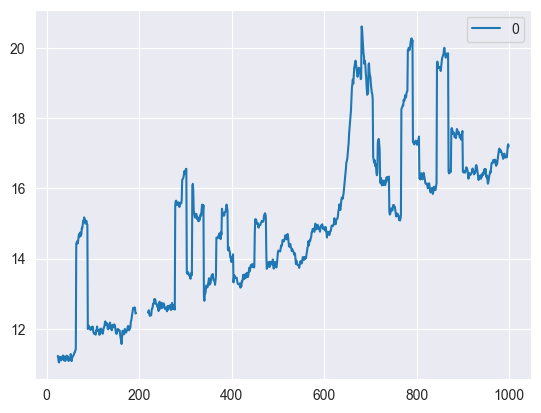

In [19]:
df2.rolling(25).mean().plot()

In [23]:
df1.head()

,0
0,1.230101e+09
1,1.230101e+09
2,1.230101e+09
3,1.230101e+09
4,1.230101e+09
